<a href="https://colab.research.google.com/github/Mastermrinal/titanic_imersify/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [78]:
# Load the dataset
file_path = '/content/tested_1.csv'
df = pd.read_csv(file_path)
# Display the first few rows and basic info of the dataset
data_head = df.head()
data_info = df.info()
data_description = df.describe()

data_head, data_info, data_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


(   PassengerId  Survived  Pclass  \
 0          892         0       3   
 1          893         1       3   
 2          894         0       2   
 3          895         0       3   
 4          896         1       3   
 
                                            Name     Sex   Age  SibSp  Parch  \
 0                              Kelly, Mr. James    male  34.5      0      0   
 1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
 2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
 3                              Wirz, Mr. Albert    male  27.0      0      0   
 4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
 
     Ticket     Fare Cabin Embarked  
 0   330911   7.8292   NaN        Q  
 1   363272   7.0000   NaN        S  
 2   240276   9.6875   NaN        Q  
 3   315154   8.6625   NaN        S  
 4  3101298  12.2875   NaN        S  ,
 None,
        PassengerId    Survived      Pclass         Age   

In [79]:
df.shape

(418, 12)

In [80]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


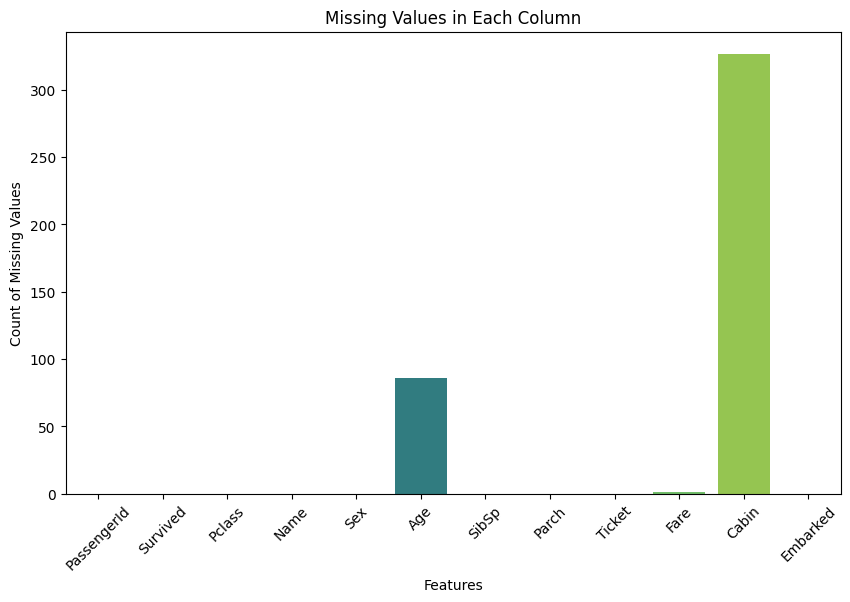

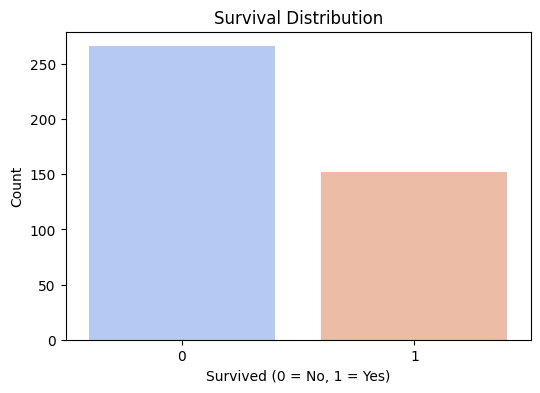

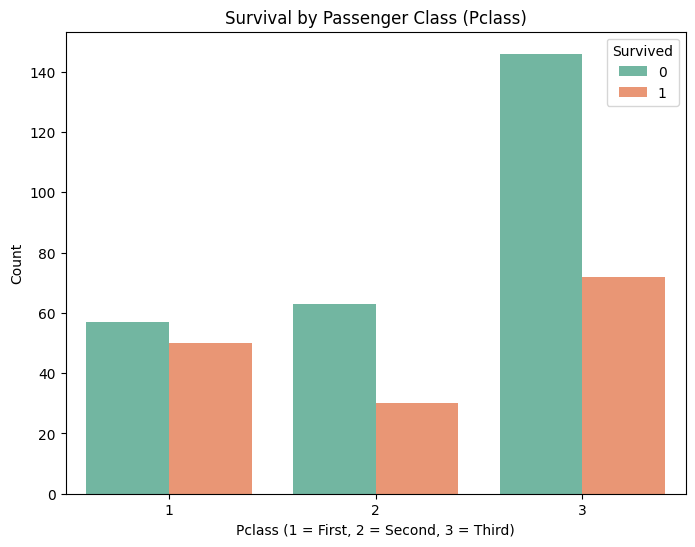

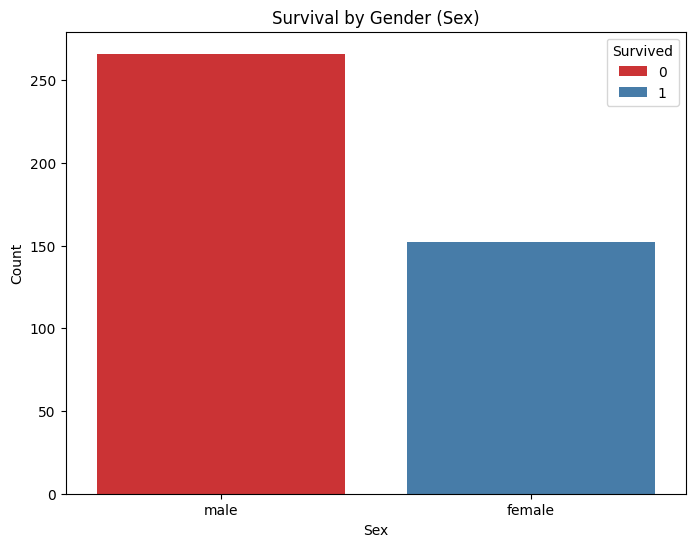

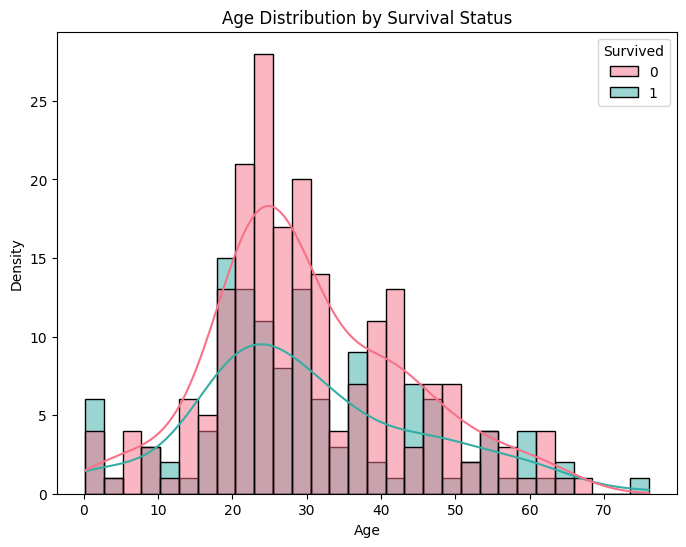

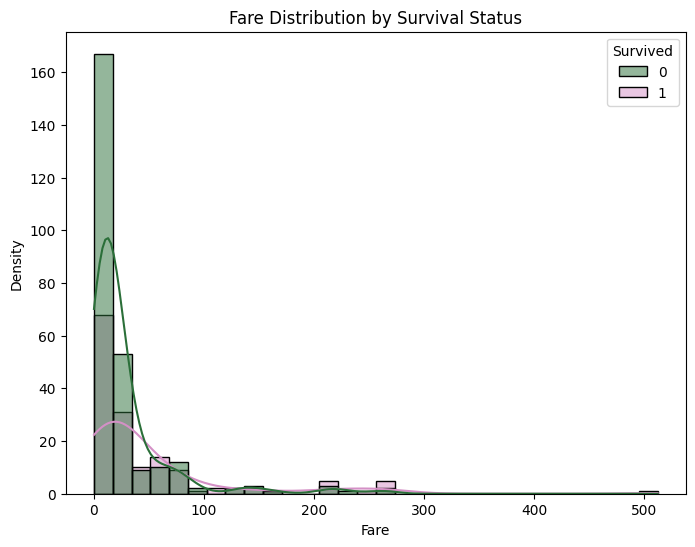

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check missing data
missing_data = df.isnull().sum()

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values, palette="viridis")
plt.title("Missing Values in Each Column")
plt.ylabel("Count of Missing Values")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.show()

# Survival distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Distribution")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Survival by Pclass
plt.figure(figsize=(8, 6))
sns.countplot(x="Pclass", hue="Survived", data=df, palette="Set2")
plt.title("Survival by Passenger Class (Pclass)")
plt.xlabel("Pclass (1 = First, 2 = Second, 3 = Third)")
plt.ylabel("Count")
plt.show()

# Survival by Sex
plt.figure(figsize=(8, 6))
sns.countplot(x="Sex", hue="Survived", data=df, palette="Set1")
plt.title("Survival by Gender (Sex)")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Age", hue="Survived", kde=True, palette="husl", bins=30)
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

# Fare distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x="Fare", hue="Survived", kde=True, palette="cubehelix", bins=30)
plt.title("Fare Distribution by Survival Status")
plt.xlabel("Fare")
plt.ylabel("Density")
plt.show()


In [82]:
df.drop(columns=['Cabin'],inplace=True)

In [83]:
dff=pd.concat([df],sort=True).reset_index(drop=True)

In [9]:
dff.shape


(418, 11)

In [10]:
df.corr(numeric_only=True)['Age'].abs()

,Age
PassengerId,0.034102
Survived,0.000013
Pclass,0.492143
Age,1.000000
SibSp,0.091587
Parch,0.061249
Fare,0.337932


In [11]:
df_Age_mean=dff.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean


Sex     Pclass
female  1         41.0
        2         24.0
        3         22.0
male    1         42.0
        2         28.0
        3         24.0
Name: Age, dtype: float64

In [12]:
dff['Age']=dff.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))



In [13]:
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1


In [14]:
dff['Title']=dff['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]
dff['Title'].value_counts()


,count
Title,
Mr,240
Miss,78
Mrs,72
Master,21
Col,2
Rev,2
Ms,1
Dr,1
Dona,1


In [15]:
dff['Title'] = dff['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dff['Title'] = dff['Title'].replace('Mlle', 'Miss')
dff['Title'] = dff['Title'].replace('Ms', 'Miss')
dff['Title'] = dff['Title'].replace('Mme', 'Mrs')


In [16]:
dff['Title'].value_counts()


,count
Title,
Mr,240
Miss,79
Mrs,72
Master,21
Rare,6


In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
# Step 1: Handle Missing Values
dff['Age'].fillna(dff['Age'].median(), inplace=True)
dff['Fare'].fillna(df['Fare'].median(), inplace=True)

# Step 2: Encode Categorical Variables
label_encoder = LabelEncoder()
dff['Sex'] = label_encoder.fit_transform(dff['Sex'])  # Male=1, Female=0
dff['Embarked'] = label_encoder.fit_transform(dff['Embarked'])

# Step 3: Feature Engineering
dff['FamilySize'] = dff['SibSp'] + dff['Parch'] + 1

# Step 4: Drop Unnecessary Columns
data_cleaned = dff.drop(columns=['Name', 'Ticket', 'PassengerId'])

# Display the first few rows of the cleaned dataset
data_cleaned.head()


,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived,Title,FamilySize
0,34.5,1,7.8292,0,3,1,0,0,Mr,1
1,47.0,2,7.0000,0,3,0,1,1,Mrs,2
2,62.0,1,9.6875,0,2,1,0,0,Mr,1
3,27.0,2,8.6625,0,3,1,0,0,Mr,1
4,22.0,2,12.2875,1,3,0,1,1,Mrs,3


In [18]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"


In [19]:
dff['Family_size'] = dff['FamilySize'].apply(family_size) # Use 'FamilySize' column instead of 'Family_size'

In [20]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          418 non-null    float64
 1   Embarked     418 non-null    int64  
 2   Fare         418 non-null    float64
 3   Name         418 non-null    object 
 4   Parch        418 non-null    int64  
 5   PassengerId  418 non-null    int64  
 6   Pclass       418 non-null    int64  
 7   Sex          418 non-null    int64  
 8   SibSp        418 non-null    int64  
 9   Survived     418 non-null    int64  
 10  Ticket       418 non-null    object 
 11  Title        418 non-null    object 
 12  FamilySize   418 non-null    int64  
 13  Family_size  418 non-null    object 
dtypes: float64(2), int64(8), object(4)
memory usage: 45.8+ KB


In [21]:
dff['Age'] = dff['Age'].astype('int64')


In [22]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=dff.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
   Embarked  Survived
0         0  0.392157
1         1  0.521739
2         2  0.325926
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.467290
1       2  0.322581
2       3  0.330275
---------- 

Survival Correlation by: Sex
   Sex  Survived
0    0       1.0
1    1       0.0
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.000000
1    Miss  1.000000
2      Mr  0.000000
3     Mrs  1.000000
4    Rare  0.166667
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.268775
1       Large  0.400000
2       Small  0.524138
---------- 



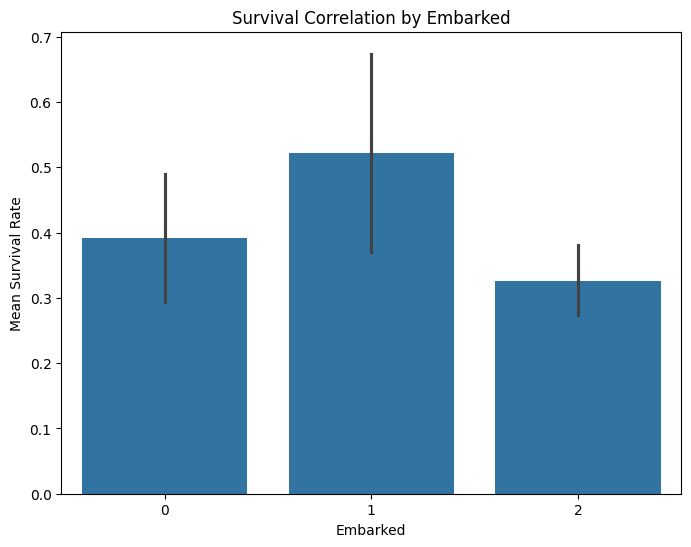

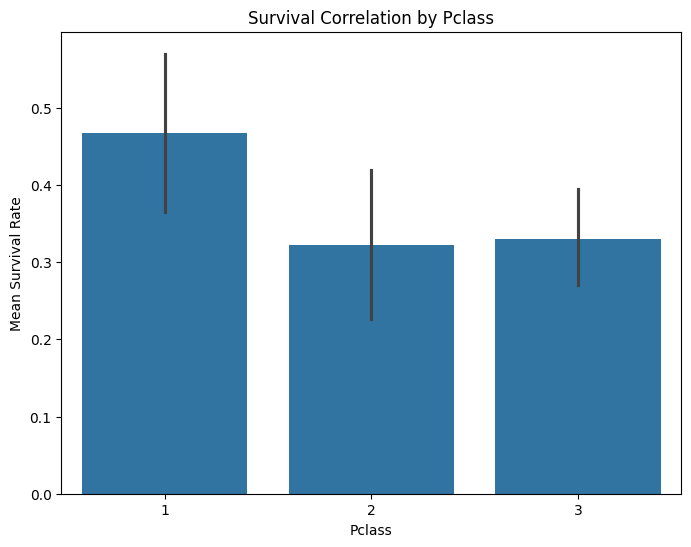

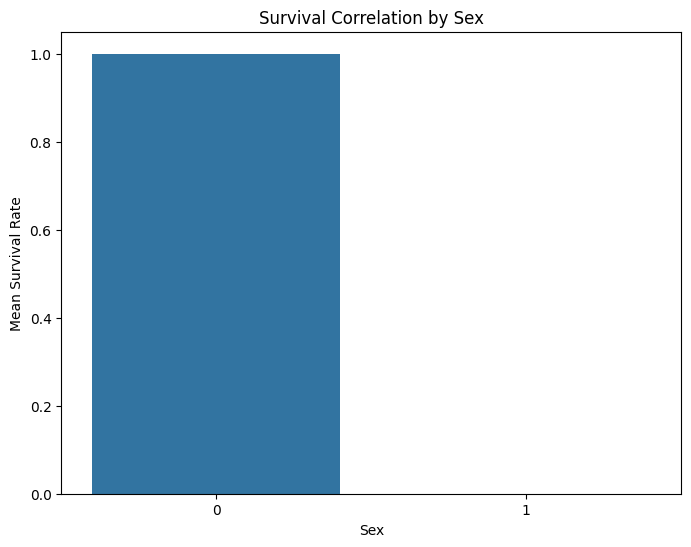

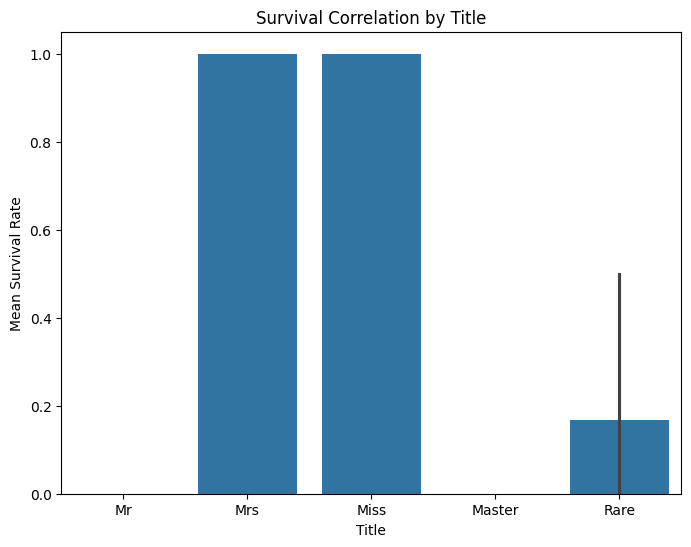

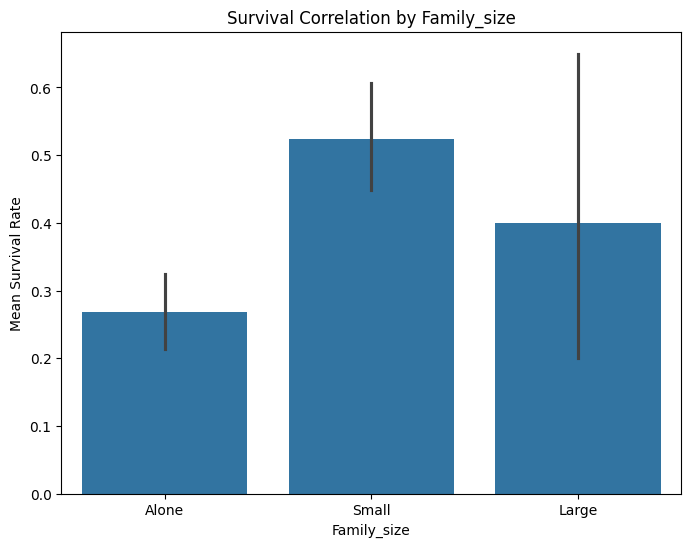

In [23]:
# prompt: make graph of above code cell

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame from the previous code cell
# ... (your previous code) ...

# Visualize the survival correlation for each category in 'col'
col = ['Embarked', 'Pclass', 'Sex', 'Title', 'Family_size']
for i in col:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    # Use 'dff' instead of 'df' to access the 'Family_size' column
    sns.barplot(x=i, y='Survived', data=dff, estimator=lambda x: x.mean())
    plt.title(f'Survival Correlation by {i}')
    plt.ylabel('Mean Survival Rate')
    plt.xlabel(i)
    plt.show()

In [24]:
import plotly.express as px
import plotly.graph_objects as go


fig = go.Figure()

fig.add_trace(go.Histogram(x=df[df['Survived']==0]['Age'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['Survived']==1]['Age'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Age Distribution by Survival',
    xaxis_title='Age',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
)

fig.show()

In [25]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=dff[dff['Survived'] == 0]['Fare'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=dff[dff['Survived'] == 1]['Fare'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Fare Distribution by Survival',
    xaxis_title='Fare',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
)

fig.show()

In [26]:
fig = go.Figure()

fig.add_trace(go.Histogram(x=dff[dff['Survived'] == 0]['Family_size'], name='Not Survived', opacity=0.5))
fig.add_trace(go.Histogram(x=dff[dff['Survived'] == 1]['Family_size'], name='Survived', opacity=0.5))

fig.update_layout(
    title='Family Size Distribution by Survival',
    xaxis_title='Family Size',
    yaxis_title='Density',
    barmode='overlay',
    bargap=0.1,
)

fig.show()

In [27]:
from plotly.subplots import make_subplots
col = ['Embarked', 'Pclass', 'Sex', 'Title']

fig = make_subplots(rows=1, cols=len(col), subplot_titles=col)

for i, c in enumerate(col, start=1):
    grouped_data = dff.groupby([c, 'Survived']).size().reset_index(name='Count')

    survived_data = grouped_data[grouped_data['Survived'] == 1]
    not_survived_data = grouped_data[grouped_data['Survived'] == 0]

    fig.add_trace(go.Bar(x=survived_data[c], y=survived_data['Count'], name='Survived', marker_color='green'), row=1, col=i)
    fig.add_trace(go.Bar(x=not_survived_data[c], y=not_survived_data['Count'], name='Not Survived', marker_color='red'), row=1, col=i)

    fig.update_xaxes(title_text=c, row=1, col=i)
    fig.update_yaxes(title_text='Count', row=1, col=i)

# Update figure layout
fig.update_layout(
    title='Countplot of Categorical Variables by Survival',
    height=400,
    showlegend=True,
    barmode='group',
)

# Show figure
fig.show()

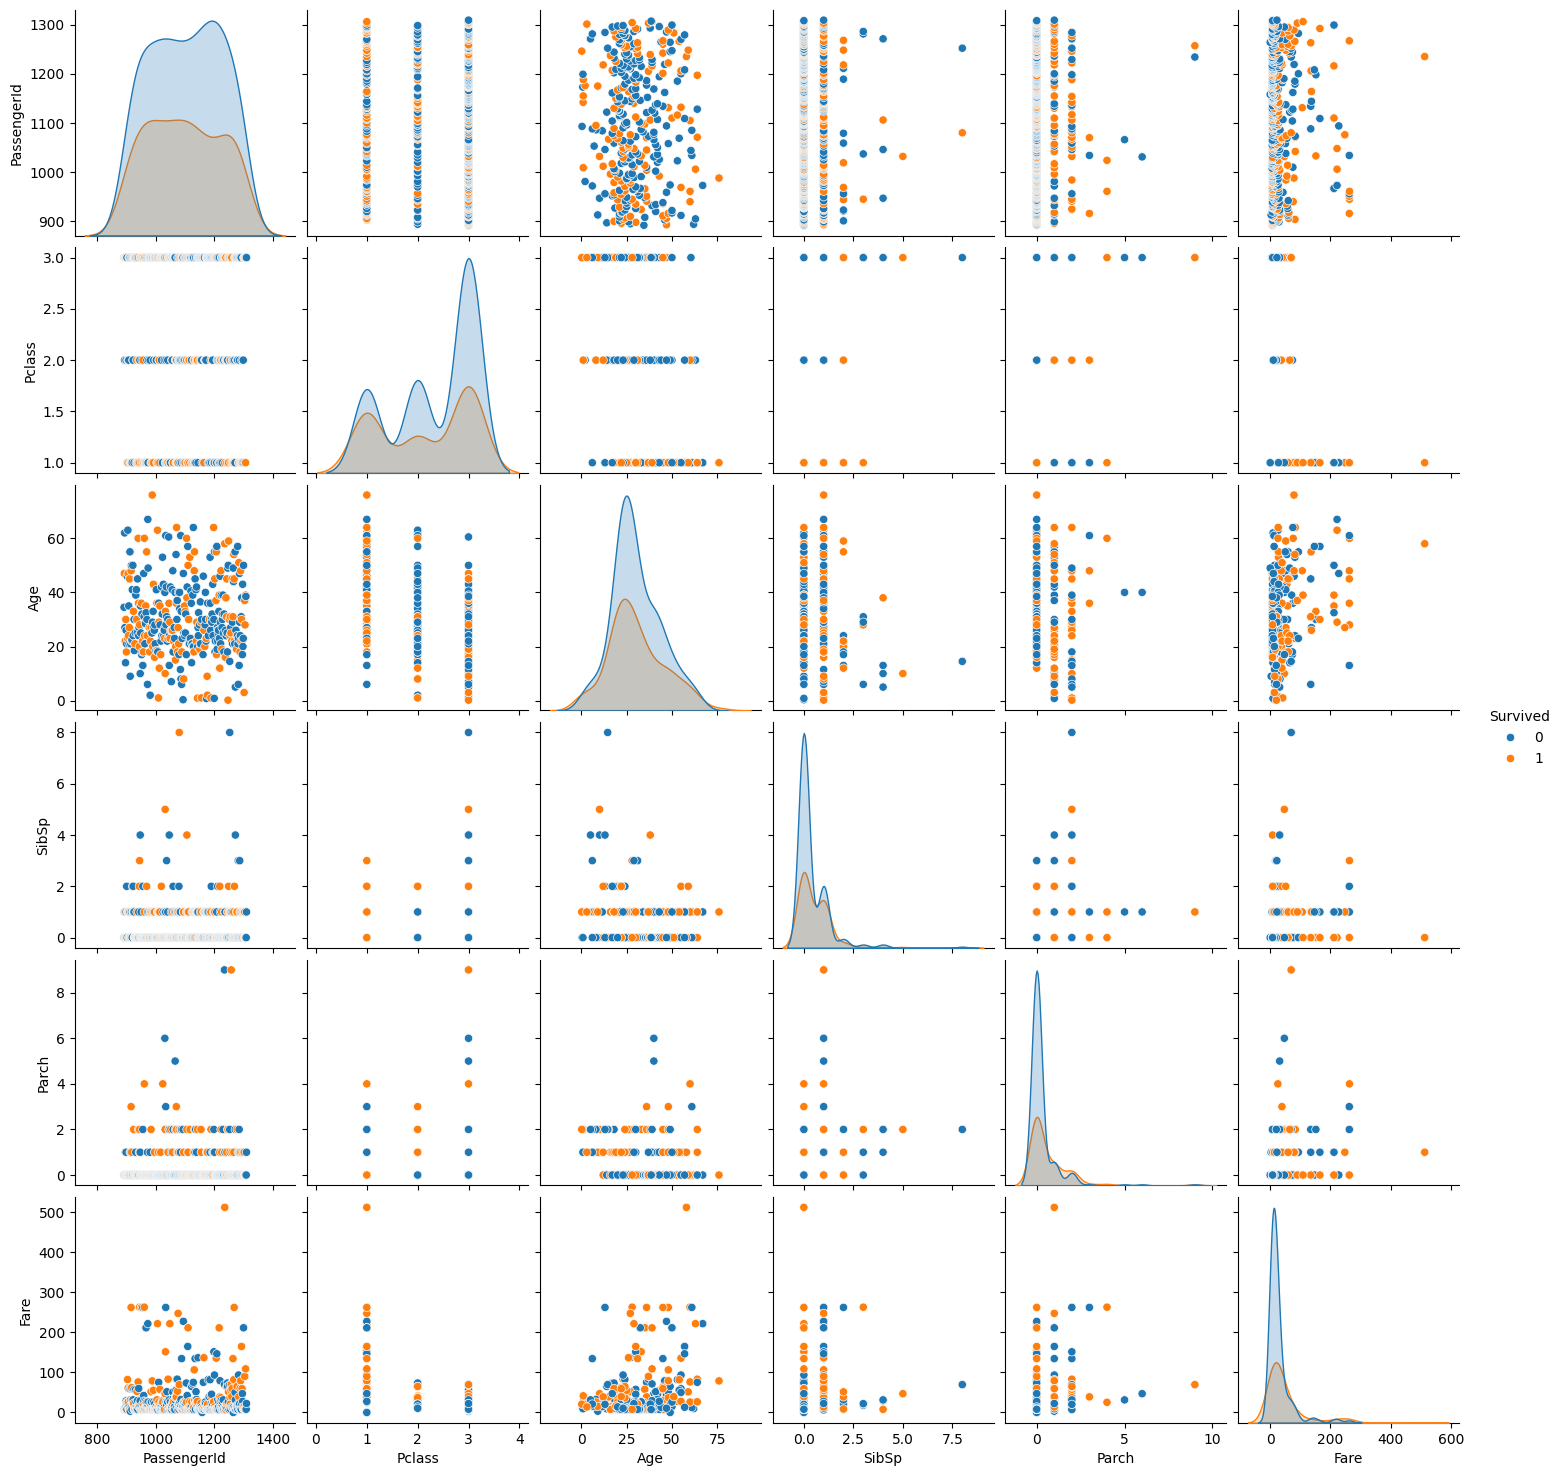

In [28]:
sns.pairplot(df,hue='Survived')



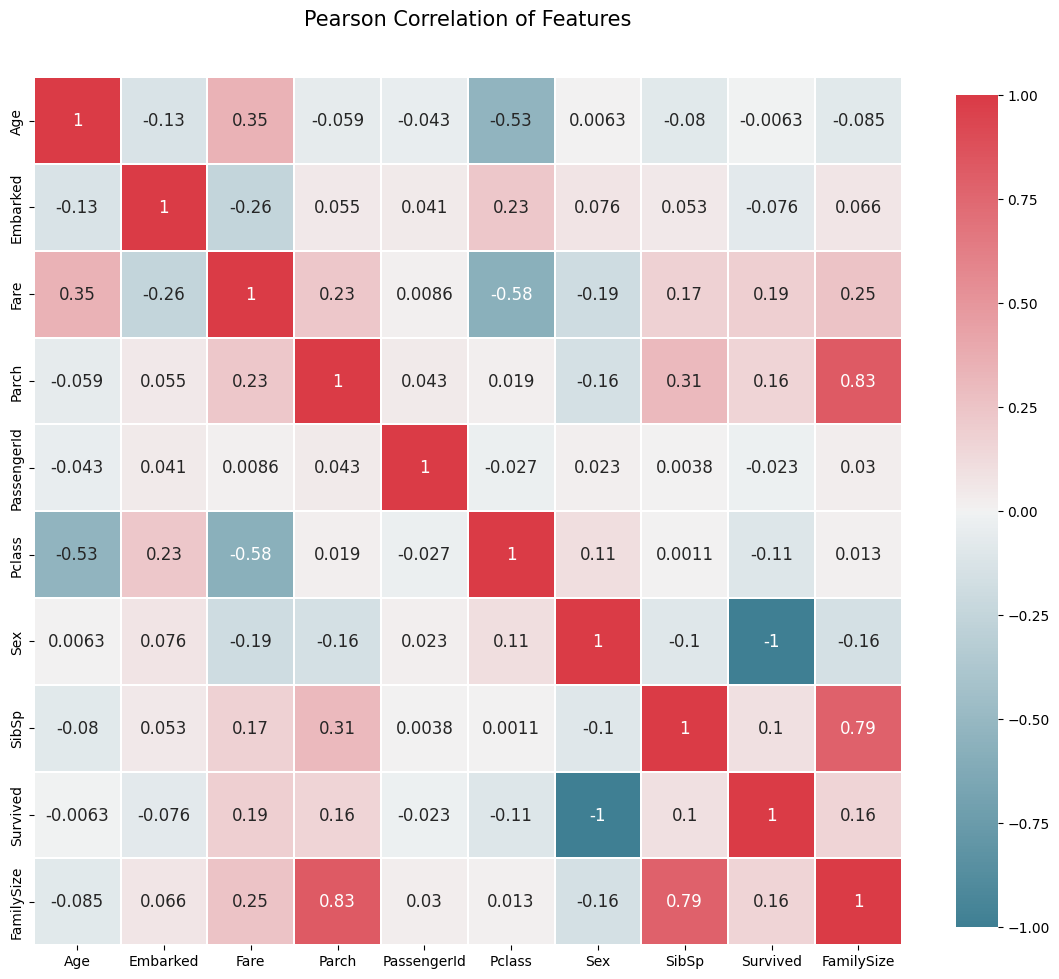

In [29]:
def correlation_heatmap(dff):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        dff.corr(numeric_only=True),
        cmap = colormap,
        square=True,
        cbar_kws={'shrink':.9 },
        ax=ax,
        annot=True,
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )

    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(dff)


In [30]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [31]:
dff.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,Family_size
0,34,1,7.8292,"Kelly, Mr. James",0,892,3,1,0,0,330911,Mr,1,Alone
1,47,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,1,363272,Mrs,2,Small
2,62,1,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,0,240276,Mr,1,Alone
3,27,2,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,0,315154,Mr,1,Alone
4,22,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,1,3101298,Mrs,3,Small


In [32]:
dff.shape

(418, 14)

In [33]:
##test and train has been splitted in the ratio of 4:1 ratio


train = dff.loc[:334]
test = dff.loc[335:]

In [34]:
print(train.shape)
print(test.shape)

(335, 14)
(83, 14)


In [35]:
X_train = train.drop("Survived",axis=1)
y_train = train["Survived"]

In [36]:
X_train.shape,y_train.shape


((335, 13), (335,))

In [37]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [38]:
from sklearn import set_config
set_config(display='diagram')

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [40]:
# Define transformers with column names
num_cat_transformation = ColumnTransformer(
    transformers=[
        ('scaling', MinMaxScaler(), ['Age', 'Fare']),  # Scale numerical columns
        ('onehot_encoding_title', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Title', 'Name', 'Sex']),# Encode 'Title'
        ('ordinal_embarked', OrdinalEncoder(), ['Embarked']),  # Encode 'Embarked'
        ('onehot_encoding_others', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Family_size', 'Sex'])  # Encode 'Family_size', 'Sex'
    ],
    remainder='passthrough'
)

In [41]:
dff.dtypes

,0
Age,int64
Embarked,int64
Fare,float64
Name,object
Parch,int64
PassengerId,int64
Pclass,int64
Sex,int64
SibSp,int64
Survived,int64


In [42]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_transformation),
        ('bins', bins),
        ('classifier', algo)
    ])

In [43]:
algorithms=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),

    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    # Trees
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),


]

In [44]:
# Define transformers with column names
num_cat_transformation = ColumnTransformer(
    transformers=[
        ('scaling', MinMaxScaler(), ['Age', 'Fare']),  # Scale numerical columns
        ('onehot_encoding_title', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Title']),# Encode 'Title' only
        ('ordinal_embarked', OrdinalEncoder(), ['Embarked']),  # Encode 'Embarked'
        ('onehot_encoding_others', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Family_size', 'Sex'])  # Encode 'Family_size', 'Sex'
    ],
    remainder='drop' # Drop the remaining columns instead of passing them through
)

bins = ColumnTransformer([
    ('Kbins', KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile'), [0, 1]),  # Apply to 'Age', 'Fare' only
], remainder='passthrough')

def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_transformation),
        ('bins', bins),
        ('classifier', algo)
    ])

In [45]:
error_score='raise'
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    try:
        # Attempt cross-validation
        scores = cross_val_score(pipeline, X_train, y_train, cv=5, error_score=error_score)
        model_names.append(algo.__class__.__name__)
        CV_Accuracy.append(scores.mean())
    except ValueError as e:
        # Handle specific ValueError if needed
        print(f"Error with {algo.__class__.__name__}: {e}")
        # Append the model name and NaN to maintain length
        model_names.append(algo.__class__.__name__)
        CV_Accuracy.append(np.nan)
    except Exception as e:
        # Handle other exceptions
        print(f"Error with {algo.__class__.__name__}: {e}")
        # Append the model name and NaN to maintain length
        model_names.append(algo.__class__.__name__)
        CV_Accuracy.append(np.nan)

model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [46]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [47]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)

In [48]:
model_df

,Model,Accuracy
0,AdaBoostClassifier,1.000000
13,LinearSVC,1.000000
2,ExtraTreesClassifier,1.000000
3,GradientBoostingClassifier,1.000000
4,RandomForestClassifier,1.000000
15,ExtraTreeClassifier,1.000000
6,LogisticRegressionCV,1.000000
7,PassiveAggressiveClassifier,1.000000
8,RidgeClassifierCV,1.000000
1,BaggingClassifier,1.000000


In [49]:
# prompt: save these model

import joblib

# Assuming 'pipeline' is your best performing pipeline from the previous code
# For example:
# pipeline = create_pipeline(ensemble.RandomForestClassifier())
# pipeline.fit(X_train, y_train)

# Save the model
joblib.dump(pipeline, 'best_model.pkl')

['best_model.pkl']

In [50]:
algo1 = ensemble.RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features=None, #Changed max_features to None.
                                                              #None is equivalent to "auto" in this context.
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1)

algo2 =ensemble.GradientBoostingClassifier(max_depth= 1, max_features='auto', n_estimators=3, random_state=42, warm_start= True)
algo3=linear_model.RidgeClassifierCV()

In [52]:
# Define transformers with column names
num_cat_transformation = ColumnTransformer(
    transformers=[
        ('scaling', MinMaxScaler(), ['Age', 'Fare']),  # Scale numerical columns
        ('onehot_encoding_title', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Title','Name','Sex']),# Encode 'Title' only
        ('ordinal_embarked', OrdinalEncoder(), ['Embarked']),  # Encode 'Embarked'
        ('onehot_encoding_others', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Family_size', 'Sex'])  # Encode 'Family_size', 'Sex'
    ],
    remainder='drop' # Drop the remaining columns including 'Ticket' instead of passing them through
)

bins = ColumnTransformer([
    ('Kbins', KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile'), [0, 1]),  # Apply to 'Age', 'Fare' only
], remainder='passthrough')

def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_transformation),
        ('bins', bins),
        ('classifier', algo)
    ])

In [58]:
pipe1=Pipeline([
        ('num_cat_transformation', num_cat_transformation), # Corrected the typo here
        ('bins', bins),
        ('classifier', algo1)
    ])

In [55]:
pipe1.fit(X_train,y_train)
pipe1.score(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    3.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished


1.0

In [54]:
# Define transformers with column names
num_cat_transformation = ColumnTransformer(
    transformers=[
        ('scaling', MinMaxScaler(), ['Age', 'Fare']),  # Scale numerical columns
        ('onehot_encoding_title', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Title','Name','Sex']),# Encode 'Title' only
        ('ordinal_embarked', OrdinalEncoder(), ['Embarked']),  # Encode 'Embarked'
        ('onehot_encoding_others', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['Family_size', 'Sex'])  # Encode 'Family_size', 'Sex'
    ],
    remainder='drop' # Drop the remaining columns including 'Ticket' instead of passing them through
)

bins = ColumnTransformer([
    ('Kbins', KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='quantile'), [0, 1]),  # Apply to 'Age', 'Fare' only
], remainder='passthrough')

def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_transformation),
        ('bins', bins),
        ('classifier', algo)
    ])

pipe1 = Pipeline([
    ('num_cat_transformation', num_cat_transformation), # Corrected typo here
    ('bins', bins),
    ('classifier', algo1)
])

pipe1.fit(X_train, y_train)
pipe1.score(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 1750 out of 1750 | elapsed:    5.3s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.5s finished


1.0

In [59]:
y_pred = pipe1.predict(X_test)
accuracy_score(y_test,y_pred)


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 1750 out of 1750 | elapsed:    0.7s finished


1.0

USING TENSORFLOW TO PREDICT THE SURVIVAL

In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [64]:
dff.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,FamilySize,Family_size
0,34,1,7.8292,"Kelly, Mr. James",0,892,3,1,0,0,330911,Mr,1,Alone
1,47,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,0,1,1,363272,Mrs,2,Small
2,62,1,9.6875,"Myles, Mr. Thomas Francis",0,894,2,1,0,0,240276,Mr,1,Alone
3,27,2,8.6625,"Wirz, Mr. Albert",0,895,3,1,0,0,315154,Mr,1,Alone
4,22,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,0,1,1,3101298,Mrs,3,Small


In [65]:
dff.shape

(418, 14)

In [85]:
dff.columns

Index(['Age', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass',
       'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

In [84]:
labels = dff['Survived']

In [86]:
# Instead of:
# labels = dff['Survived']

# Try:
labels = dff['Survived'] if 'Survived' in dff.columns else None

# Check if labels is None and handle it accordingly
if labels is None:
    print("Column 'Survived' not found in the DataFrame. Check for typos or previous operations.")
else:
      print("Column 'Survived' found",labels)


    # Proceed with your TensorFlow code
    # ... (rest of your code) ...

Column 'Survived' found 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64


In [87]:
labels

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [100]:
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = dff[features]  # Features DataFrame
y = dff['Survived']  # Target variable

# Handle categorical features (one-hot encoding)
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2. Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # Input layer
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer (sigmoid for binary classification)

# 3. Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# 4. Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# 5. Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Train on 267 samples, validate on 67 samples
Epoch 1/100
267/267 [==============================] - 0s 532us/sample - loss: nan - acc: 0.6255 - val_loss: nan - val_acc: 0.6716
Epoch 2/100
267/267 [==============================] - 0s 85us/sample - loss: nan - acc: 0.6404 - val_loss: nan - val_acc: 0.6716
Epoch 3/100
267/267 [==============================] - 0s 92us/sample - loss: nan - acc: 0.6404 - val_loss: nan - val_acc: 0.6716
Epoch 4/100
267/267 [==============================] - 0s 75us/sample - loss: nan - acc: 0.6404 - val_loss: nan - val_acc: 0.6716
Epoch 5/100
267/267 [==============================] - 0s 81us/sample - loss: nan - acc: 0.6404 - val_loss: nan - val_acc: 0.6716
Epoch 6/100
267/267 [==============================] - 0s 80us/sample - loss: nan - acc: 0.6404 - val_loss: nan - val_acc: 0.6716
Epoch 7/100
267/267 [==============================] - 0s 79us/sample - loss: nan - acc: 0.6404 - val_loss: nan - val_acc: 0.6716
Epoch 8/100
267/267 [=======================

In [102]:
model.save('titanic_survival_model.keras')
from tensorflow.keras.models import load_model##saving the model

# Load the saved model
loaded_model = load_model('titanic_survival_model.keras')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [104]:
##TESTING THE MODEL
# Load the saved model
model = load_model('titanic_survival_model.keras')

# Select features used for training
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

# Get a random row from the DataFrame
random_row = dff.sample(1)

# Extract features from the random row
input_data = random_row[features]

# Handle categorical features (one-hot encoding)
input_data = pd.get_dummies(input_data, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure the input data has the same columns as during training
# Get original columns from X before transformation
original_columns = X.columns

# Get missing columns
missing_cols = set(original_columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0
input_data = input_data[original_columns]

# Scale numerical features
input_data = scaler.transform(input_data)

# Make prediction
prediction = model.predict(input_data)[0][0]

# Interpret the prediction
survival_probability = prediction
survival_prediction = 1 if survival_probability >= 0.5 else 0

print("Random Input Data:")
print(random_row)
print("\nPrediction:")
print(f"Survival Probability: {survival_probability:.4f}")
print(f"Survival Prediction: {survival_prediction} (0 = No, 1 = Yes)")

Random Input Data:
     Age Embarked  Fare                      Name  Parch  PassengerId  Pclass  \
46  45.0        C  29.7  Chevre, Mr. Paul Romaine      0          938       1   

     Sex  SibSp  Survived    Ticket  
46  male      0         0  PC 17594  

Prediction:
Survival Probability: nan
Survival Prediction: 0 (0 = No, 1 = Yes)
